### Instrucciones

El conjunto de datos a explorar es un set de datos de recaudaciones de
películas de cine. En el siguiente enlace se pueden obtener los datos, así
como el detalle del contenido de estos: Movie Industry | Kaggle 

* Quedan excluidas del desafío las variables: director, star y writer

#### Cuestiones planteadas

En la presentación se espera que des recomendaciones de qué tipo de
películas debería hacer una productora de cine que quiere maximizar el
beneficio de sus producciones. A modo de ejemplo, estas son algunas de las
preguntas que se puede plantear la compañía en este sentido:

• ¿En qué género debería enfocarme?

• ¿Qué tan importante es producir una buena película (rating IMDB alto)
para obtener muchos ingresos?

• ¿Es mejor producir una película para todos los públicos? ¿O una dirigida
sólo al público adulto?

• ...

In [25]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


In [3]:
# Reading data

data = pd.DataFrame(pd.read_csv('../raw_data/movies.csv', encoding = 'iso-8859-1'))

In [5]:
data.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [6]:
# Dropping director, star and writer
data = data.drop(columns =['director', 'star', 'writer'])



In [34]:
data.head()

,budget,company,country,genre,gross,name,rating,released,runtime,score,votes,year
0,0.026667,Columbia Pictures Corporation,USA,Adventure,52287414.0,Stand by Me,R,1986-08-22,0.123418,0.846154,0.160690,1986
1,0.020000,Paramount Pictures,USA,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,0.167722,0.807692,0.142194,1986
2,0.050000,Paramount Pictures,USA,Action,179800601.0,Top Gun,PG,1986-05-16,0.189873,0.692308,0.127244,1986
3,0.061667,Twentieth Century Fox Film Corporation,USA,Action,85160248.0,Aliens,R,1986-07-18,0.275316,0.884615,0.290134,1986
4,0.030000,Walt Disney Pictures,USA,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,0.126582,0.692308,0.019665,1986


### Data Preparation

In [14]:
#Checking for duplicates

len(data) # Check number of rows before removing duplicates
data = data.drop_duplicates() # Remove duplicates
len(data)# Check new number of rows

6820

In [15]:
# Checking for null values 

data.isnull().sum().sort_values(ascending=False)/len(data) #NaN percentage for each column

budget      0.0
company     0.0
country     0.0
genre       0.0
gross       0.0
name        0.0
rating      0.0
released    0.0
runtime     0.0
score       0.0
votes       0.0
year        0.0
dtype: float64

/Users/santiagochiesa/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/santiagochiesa/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/santiagochiesa/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version

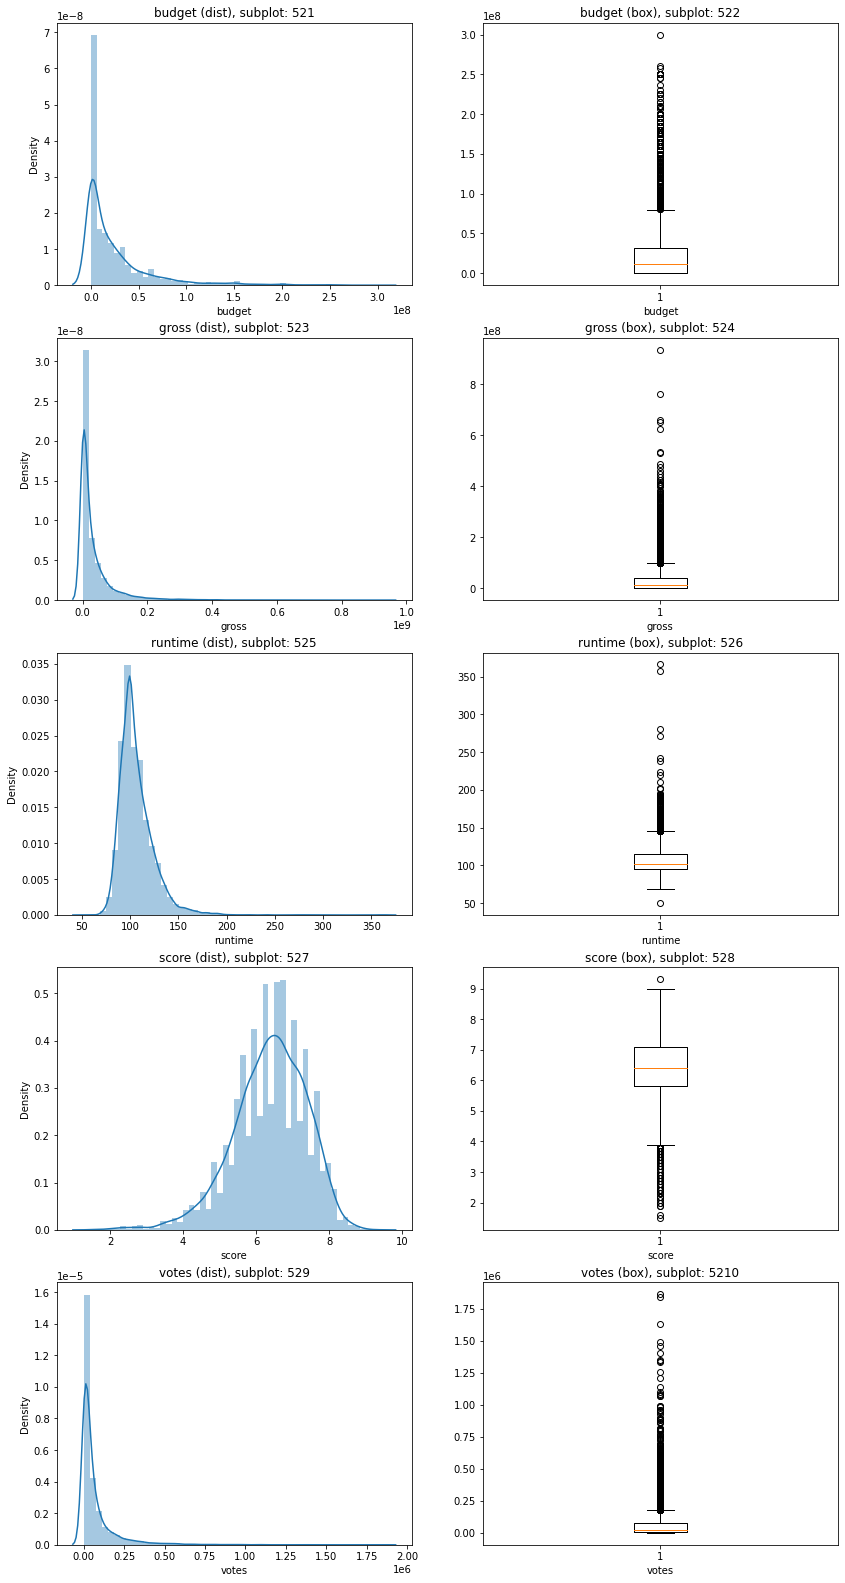

In [20]:
# Plotting and checking for false outliers

#  Numerical Data
data_NUM = ['budget', 'gross', 'runtime', 'score', 'votes']

#  plot Numerical Data
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(14,28))

for i in data_NUM:
    plt.subplot(a, b, c)
    plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.distplot(data[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {}{}{}'.format(i, a, b, c))
    plt.xlabel(i)
    plt.boxplot(x = data[i])
    c = c + 1

In [22]:
# Scaling numeric independent variables 

# Defining numeric independent variables
data_NUM_X = ['budget', 'runtime', 'score', 'votes']

scaler = MinMaxScaler() # Instanciate MinMaxScaler


for i in data_NUM_X:
    scaler.fit(data[[i]]) # Fit scaler to data
    data[i] = scaler.transform(data[[i]]) # Use scaler to transform data
    



In [46]:
# Checking number of unique values for categorical variables

data_CAT = ['company', 'country', 'genre', 'rating']
for i in data_CAT:
    print(f'{i} has {data[i].nunique()} unique values.')


company has 2179 unique values
country has 57 unique values
genre has 17 unique values
rating has 13 unique values


In [70]:
# Encoding Genre and Rating
genre_rating_encoding = pd.DataFrame(data[['genre','rating']])
genre_rating_encoding = pd.get_dummies(genre_rating_encoding)
genre_rating_encoding

# must merge genre_rating_encoding into data

,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,genre_Family,genre_Fantasy,genre_Horror,...,rating_NC-17,rating_NOT RATED,rating_Not specified,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-MA,rating_TV-PG,rating_UNRATED
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6816,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6817,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6818,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

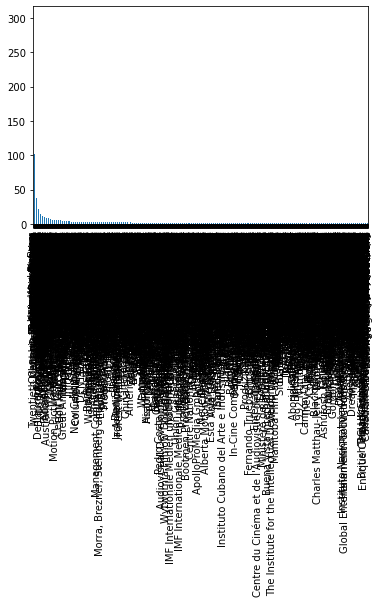

In [55]:
# Most frequent Companies

# https://www.kaggle.com/learn-forum/114857

data['company'].value_counts().plot(kind='bar') #Fix this graph

In [ ]:
# Most frequent Countries

# https://www.kaggle.com/learn-forum/114857

In [ ]:
# Create adult rating variable